In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import re

In [12]:
sns.set(style="whitegrid")

In [3]:
df_spotify = pd.read_csv(r'data\spotify_dataset.csv')
#df_grammy2 = pd.read_csv(r'dags\the_grammy_awards.csv')

In [4]:
# 🔗 Conexión a MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='workshop2',
    port=3306
)

df_grammy = pd.read_sql("SELECT * FROM grammy", conn)
print(df_grammy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4810 non-null   int64 
 1   year          4810 non-null   int64 
 2   title         4810 non-null   object
 3   published_at  4810 non-null   object
 4   updated_at    4810 non-null   object
 5   category      4810 non-null   object
 6   nominee       4810 non-null   object
 7   artist        4810 non-null   object
 8   workers       4810 non-null   object
 9   img           4810 non-null   object
 10  winner        4810 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.5+ KB
None


C:\Users\migue\AppData\Local\Temp\ipykernel_50408\1951989165.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_grammy = pd.read_sql("SELECT * FROM grammy", conn)


In [5]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df_spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df_grammy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4810 non-null   int64 
 1   year          4810 non-null   int64 
 2   title         4810 non-null   object
 3   published_at  4810 non-null   object
 4   updated_at    4810 non-null   object
 5   category      4810 non-null   object
 6   nominee       4810 non-null   object
 7   artist        4810 non-null   object
 8   workers       4810 non-null   object
 9   img           4810 non-null   object
 10  winner        4810 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.5+ KB


In [8]:
df_grammy.head()

,id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [9]:
df_grammy.nunique()

id              4810
year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4132
artist          1659
workers         2367
img             1464
winner             1
dtype: int64

In [10]:
#Revisar nulos que workbench llena con ''
empty_counts = (df_grammy == '').sum()
print(empty_counts)

id                 0
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64


In [30]:
#Revisar nulos que workbench llena con ''
empty_counts = (df_grammy == '').sum()
print(empty_counts)

id             0
year           0
title          0
category       0
nominee        0
artist      1609
winner         0
dtype: int64


## SPOTIFY

In [36]:
# 1️⃣ Contar cuántos duplicados completos existen
duplicates_total = df_spotify.duplicated().sum()
print(f"Registros duplicados completos encontrados: {duplicates_total}")

# 2️⃣ Eliminar duplicados (mantener el primero)
df_spotify = df_spotify.drop_duplicates(keep='first')

# 3️⃣ Confirmar tamaño final
print(f"Total de registros después de eliminar duplicados: {len(df_spotify)}")


Registros duplicados completos encontrados: 0
Total de registros después de eliminar duplicados: 114000


In [37]:
# 1️⃣ Contar cuántos IDs están repetidos
duplicated_ids = df_spotify['track_id'].duplicated().sum()
print(f"Track IDs duplicados encontrados: {duplicated_ids}")

# 2️⃣ Ver ejemplos concretos (si existen)
if duplicated_ids > 0:
    duplicated_tracks = df_spotify[df_spotify['track_id'].duplicated(keep=False)]
    print("Ejemplos de track_id duplicados:")
    print(duplicated_tracks.sort_values('track_id').head(10))
else:
    print("✅ No hay track_id duplicados.")


Track IDs duplicados encontrados: 24259
Ejemplos de track_id duplicados:
        Unnamed: 0                track_id                       artists  \
15028        15028  001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby   
103211      103211  001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby   
85578        85578  001YQlnDSduXd5LgBd66gT                   Soda Stereo   
100420      100420  001YQlnDSduXd5LgBd66gT                   Soda Stereo   
91801        91801  003vvx7Niy0yvhvHt4a68B                   The Killers   
3257          3257  003vvx7Niy0yvhvHt4a68B                   The Killers   
2106          2106  003vvx7Niy0yvhvHt4a68B                   The Killers   
33178        33178  004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu   
94239        94239  004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu   
97533        97533  006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   

                             album_name  \
15028                           New RnB   
1032

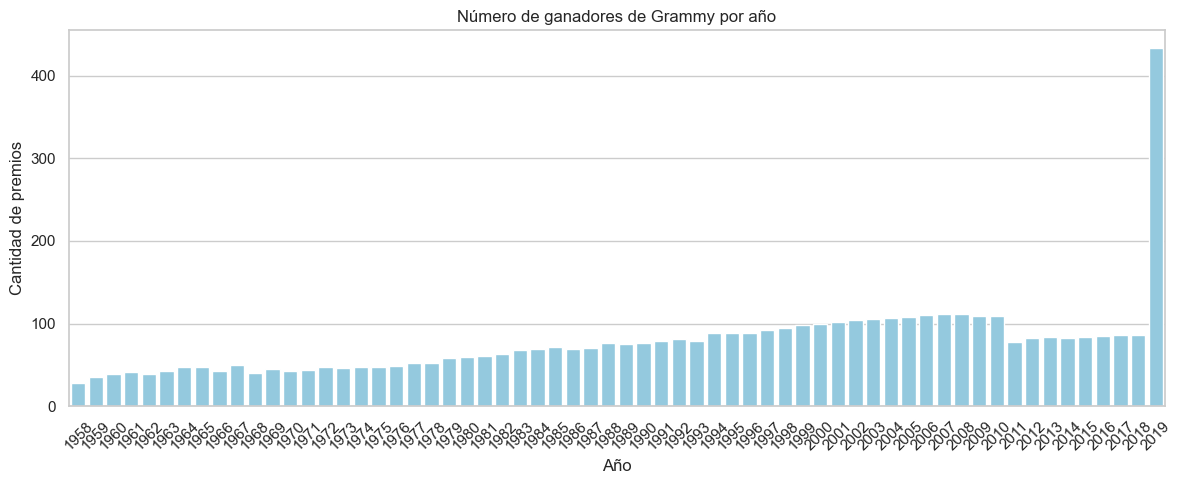

In [18]:
# ==============================
# CELDA 3: Grammy - Distribución de ganadores por año
# ==============================
plt.figure(figsize=(12,5))
sns.countplot(data=df_grammy[df_grammy['winner'].str.lower() == 'true'], x='year', color='skyblue')
plt.xticks(rotation=45)
plt.title("Número de ganadores de Grammy por año")
plt.ylabel("Cantidad de premios")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

C:\Users\migue\AppData\Local\Temp\ipykernel_50408\1176105832.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


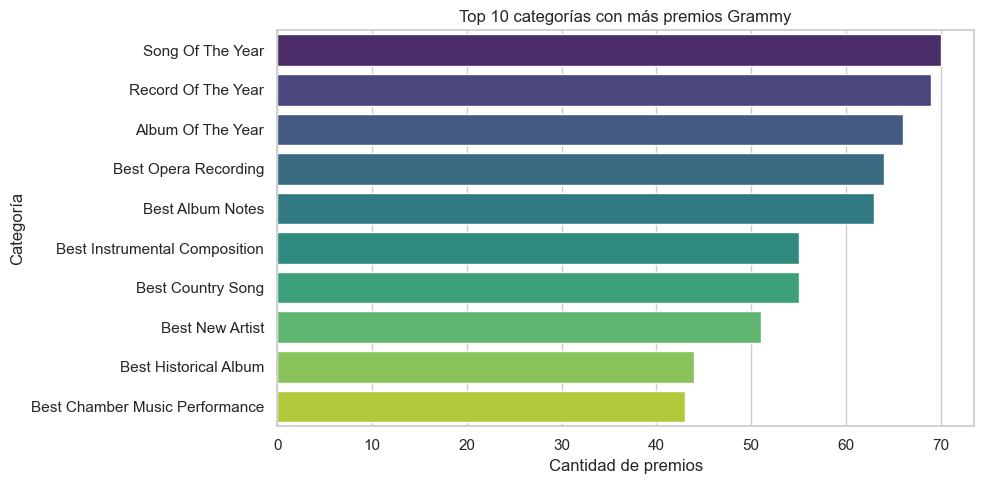

In [19]:
# Asegurarse de que 'winner' esté en booleano
# Si tu columna tiene 'True'/'False' en texto o N/A
df_grammy['winner_bool'] = df_grammy['winner'].astype(str).str.lower().map({'true': True, 'false': False})
df_grammy['winner_bool'] = df_grammy['winner_bool'].fillna(False)

# Filtrar solo ganadores
top_categories = df_grammy[df_grammy['winner_bool']].groupby('category').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 categorías con más premios Grammy")
plt.xlabel("Cantidad de premios")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()


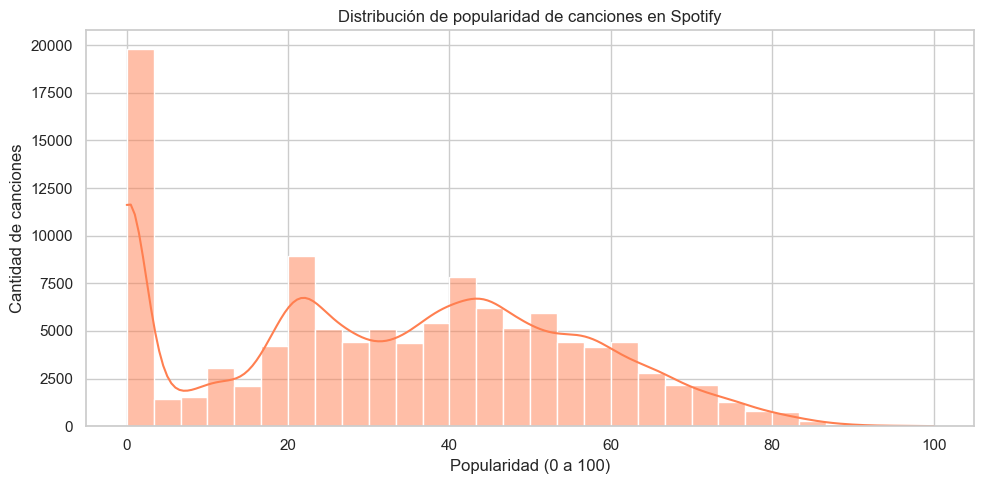

In [16]:
# ==============================
# CELDA 5: Spotify - Distribución de popularidad
# ==============================
plt.figure(figsize=(10,5))
sns.histplot(df_spotify['popularity'], bins=30, kde=True, color='coral')
plt.title("Distribución de popularidad de canciones en Spotify")
plt.xlabel("Popularidad (0 a 100)")
plt.ylabel("Cantidad de canciones")
plt.tight_layout()
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_50408\2587782671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")


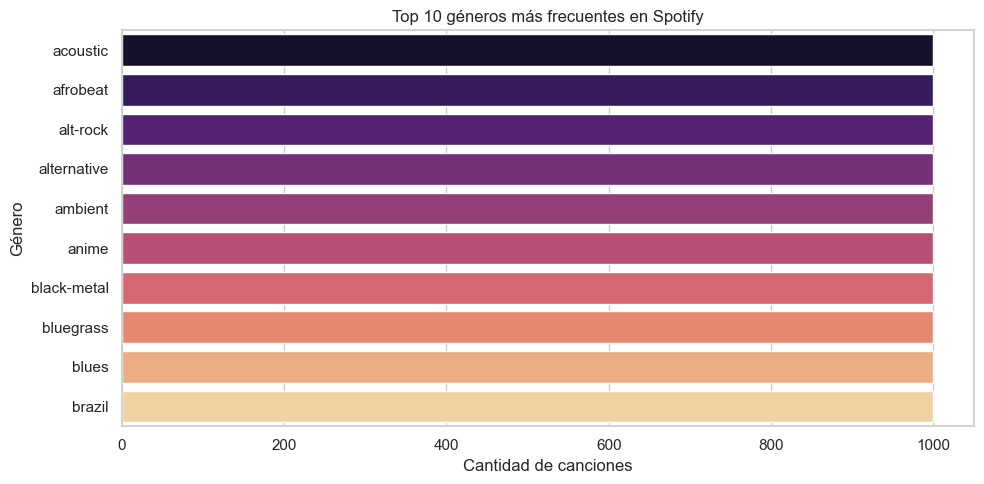

In [17]:
# ==============================
# CELDA 6: Spotify - Distribución de géneros musicales
# ==============================
top_genres = df_spotify['track_genre'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")
plt.title("Top 10 géneros más frecuentes en Spotify")
plt.xlabel("Cantidad de canciones")
plt.ylabel("Género")
plt.tight_layout()
plt.show()
